In [1]:
from society import Society
import matplotlib.pyplot as plt
import numpy as np

Wall time: 27.6 s


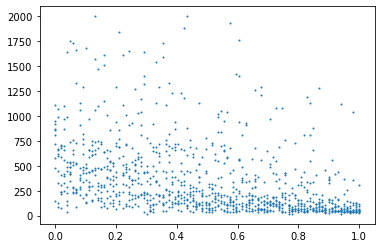

In [2]:
%%time

# Creative_density

# meta parameters
space_size = 41 # prime number provides opportunity for everyone
agents_density = 0.4
field_range = 5
field_force = 0.05 # may be important

max_days = 2000
tolerance = 0.01 # percentage of agents left
iterations_per_example = 10

creative_density_list = np.linspace(0, 1, 100)
X = []
for i in creative_density_list:
    X.extend([i]*iterations_per_example)
Y = []
for society in [Society(space_size=space_size, agents_density=agents_density
                        , field_range=field_range, field_force=field_force
                        , creative_density=c) for c in creative_density_list]:
    for _ in range(iterations_per_example):
        society.new_society()
        _counter = 0
        while society.get_all_progress() < (1 - tolerance) and _counter < max_days:
            society.next_step()
            _counter += 1
        Y.append(society.day)
        
plt.plot(X, Y, "o", markersize=1)

Wall time: 34.8 s


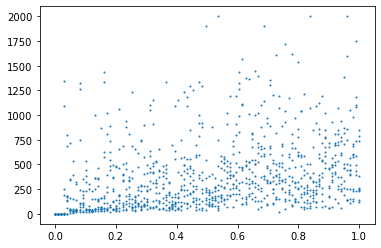

In [4]:
%%time

# Agent density

# meta parameters
space_size = 41 # prime number provides opportunity for everyone
creative_density = 0.5
field_range = 5
field_force = 0.05

max_days = 2000
tolerance = 0.01 # percentage of agents left
iterations_per_example = 10

agent_density_list = np.linspace(0, 1, 100)
X = []
for i in agent_density_list:
    X.extend([i]*iterations_per_example)
Y = []
for society in [Society(space_size=space_size, creative_density=creative_density
                        , field_range=field_range, field_force=field_force
                        , agents_density=d) for d in agent_density_list]:
    for _ in range(iterations_per_example):
        society.new_society()
        # sum_days = 0
        _counter = 0
        while society.get_all_progress() < (1 - tolerance) and _counter < max_days:
            society.next_step()
            _counter += 1
        # sum_days += society.day
        Y.append(society.day)
        
plt.plot(X, Y, "o", markersize=1)

Wall time: 11.3 s


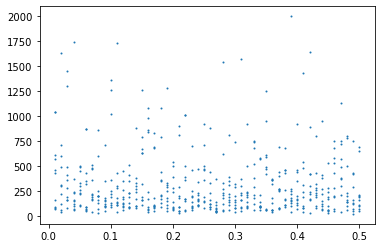

In [5]:
%%time

# field force

# meta parameters
space_size = 41 # prime number provides opportunity for everyone
agents_density = 0.4
field_range = 5
creative_density = 0.5

max_days = 2000
tolerance = 0.01 # percentage of agents left
iterations_per_example = 10

field_force_list = np.linspace(0.01, 0.5, 50)
X = []
for i in field_force_list:
    X.extend([i]*iterations_per_example)
Y = []
for society in [Society(space_size=space_size, agents_density=agents_density
                        , field_range=field_range, creative_density=creative_density
                        , field_force=f) for f in field_force_list]:
    for _ in range(iterations_per_example):
        society.new_society()
        _counter = 0
        while society.get_all_progress() < (1 - tolerance) and _counter < max_days:
            society.next_step()
            _counter += 1
        Y.append(society.day)
        
plt.plot(X, Y, "o", markersize=1)